# Extreme Whether Event Prediction

## Exploratory Data Analysis on Wildfire Dataset

## Introduction
In this project, we aim to predict extreme weather events with a focus on wildfires. Wildfires are a significant natural disaster that cause extensive damage to the environment, property, and human life. Accurate prediction of wildfires can help in planning and mitigating these risks.

## Dataset Sources
For our analysis, we are using publicly available wildfire datasets. Below are two reliable sources where the same dataset can be accessed:

1. **[National Interagency Fire Occurrence - Sixth Edition (1992-2020) on Data.gov](https://catalog.data.gov/dataset/national-interagency-fire-occurrence-sixth-edition-1992-2020-feature-layer)**
   - This dataset contains wildfire occurrence data from various agencies across the United States, covering the years 1992 to 2020.


2. **[Kaggle - US Wildfire Records (6th Edition)](https://www.kaggle.com/datasets/behroozsohrabi/us-wildfire-records-6th-edition)**
   - The same dataset as above, available for easy access and use on Kaggle.

## Instructions to Save the Dataset
Once you have downloaded the dataset from either of the above sources, save it in your working directory with the file name `data.csv`. This is necessary because the following code reads the dataset from `data.csv`.

In [1]:
import dask.dataframe as dd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq
import matplotlib.colors as mcolors
import matplotlib.dates as mdates

## Data Loading and Overview
- Load the dataset into a Pandas DataFrame.
- Display the first few rows.
- Print a summary of the dataset.

In [2]:
# Specify dtypes for the columns with mixed types
dtype_spec = {
    9: 'str',
    11: 'str',
    12: 'str',
    13: 'str',
    14: 'str',
    15: 'str',
    16: 'str',
    17: 'str',
    18: 'str',
    19: 'str',
    26: 'str',
    27: 'str',
    36: 'str',
    38: 'str'
}

# Read the CSV file with specified dtypes
df = pd.read_csv("data.csv", dtype=dtype_spec)
pd.set_option('display.max_columns', None)

In [3]:
df

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_INCIDENT_JOIN_ID,ICS_209_PLUS_COMPLEX_JOIN_ID,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2/2/2005,33,1300.0,Human,Power generation/transmission/distribution,NaN,2/2/2005,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63,6063.0,Plumas County
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,5/12/2004,133,845.0,Natural,Natural,NaN,5/12/2004,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61,6061.0,Placer County
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,5/31/2004,152,1921.0,Human,Debris and open burning,NaN,5/31/2004,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,6017.0,El Dorado County
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,6/28/2004,180,1600.0,Natural,Natural,NaN,7/3/2004,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3,6003.0,Alpine County
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,6/28/2004,180,1600.0,Natural,Natural,NaN,7/3/2004,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3,6003.0,Alpine County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303561,2303562,b'\x00\x01\xad\x10\x00\x00\xcc\x9a\xedDh=[\xc0...,400732978,ICS209_2020_11710294,INTERAGCY,IA-ICS209,BLM,USCOGRD,Grand Junction Field Office,COGRD,Grand Junction Field Office,NaN,105,NaN,JONES,2020_11710294_JONES,NaN,NaN,NaN,NaN,2020,6/5/2020,157,1741.0,Natural,Natural,NaN,NaN,NaN,NaN,1.00,B,39.037890,-108.959500,MISSING/NOT SPECIFIED,CO,NaN,NaN,NaN
2303562,2303563,b'\x00\x01\xad\x10\x00\x00\xe8\x11\xda\xda1\xe...,400732979,ICS209_2020_11781527,INTERAGCY,IA-ICS209,ST/C&L,USCAMMU,Merced-Mariposa Unit,CAMMU,Merced-Mariposa Unit,NaN,14707,NaN,POWER,2020_11781527_POWER,NaN,NaN,NaN,NaN,2020,7/11/2020,193,1958.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,NaN,NaN,NaN,100.00,D,37.148611,-119.503056,Private,CA,Madera,6039.0,Madera County
2303563,2303564,b'\x00\x01\xad\x10\x00\x00P\xf6\xa7\x9eV\x9c\\...,400732980,ICS209_2020_11815219,INTERAGCY,IA-ICS209,FS,USMTBRF,Bitterroot National Forest,MTBRF,Bitterroot National Forest,NaN,20179,NaN,12 MILE,2020_11815219_12 MILE,NaN,NaN,NaN,NaN,2020,8/27/2020,240,1911.0,Natural,Natural,NaN,NaN,NaN,NaN,50.00,C,46.151370,-114.442800,MISSING/NOT SPECIFIED,MT,NaN,NaN,NaN
2303564,2303565,b'\x00\x01\xad\x10\x00\x00\\\x87\xc8\xbbS\x07^...,400732982,ICS209_2020_11831809,INTERAGCY,IA-ICS209,FWS,USWAMCR,Mid Columbia National Wildlife Refuge Complex,WAMCR,Mid Columbia National Wildlife Refuge Complex,NaN,508,NaN,TAYLOR POND,2020_11831809_TAYLOR POND,NaN,WA4667012011520200817,TAYLOR POND,NaN,2020,8/17/2020,230,755.0,Natural,Natural,NaN,8/20/2020,233.0,1900.0,24892.00,G,46.670340,-120.114500,UNDEFINED FEDERAL,WA,Yakima,53077.0,Ya

In [4]:
df.columns

Index(['OBJECTID', 'Shape', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID',
       'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR',
       'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME'],
      dtype='object')

In [5]:
df.head()

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_INCIDENT_JOIN_ID,ICS_209_PLUS_COMPLEX_JOIN_ID,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2/2/2005,33,1300.0,Human,Power generation/transmission/distribution,NaN,2/2/2005,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63,6063.0,Plumas County
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,5/12/2004,133,845.0,Natural,Natural,NaN,5/12/2004,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61,6061.0,Placer County
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,5/31/2004,152,1921.0,Human,Debris and open burning,NaN,5/31/2004,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,6017.0,El Dorado County
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,6/28/2004,180,1600.0,Natural,Natural,NaN,7/3/2004,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3,6003.0,Alpine County
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,6/28/2004,180,1600.0,Natural,Natural,NaN,7/3/2004,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3,6003.0,Alpine County


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 39 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   OBJECTID                       int64  
 1   Shape                          object 
 2   FOD_ID                         int64  
 3   FPA_ID                         object 
 4   SOURCE_SYSTEM_TYPE             object 
 5   SOURCE_SYSTEM                  object 
 6   NWCG_REPORTING_AGENCY          object 
 7   NWCG_REPORTING_UNIT_ID         object 
 8   NWCG_REPORTING_UNIT_NAME       object 
 9   SOURCE_REPORTING_UNIT          object 
 10  SOURCE_REPORTING_UNIT_NAME     object 
 11  LOCAL_FIRE_REPORT_ID           object 
 12  LOCAL_INCIDENT_ID              object 
 13  FIRE_CODE                      object 
 14  FIRE_NAME                      object 
 15  ICS_209_PLUS_INCIDENT_JOIN_ID  object 
 16  ICS_209_PLUS_COMPLEX_JOIN_ID   object 
 17  MTBS_ID                        object 
 18  MT

### Column Descriptions

- **FOD_ID**: Unique numeric record identifier.
- **FPA_ID**: Unique identifier that contains information necessary to track back to the original record in the source dataset.
- **SOURCE_SYSTEM_TYPE**: Type of source database or system that the record was drawn from (FED = federal, NONFED = nonfederal, or INTERAGCY = interagency).
- **SOURCE_SYSTEM**: Name or other identifier for the source database or system that the record was drawn from.
- **NWCG_REPORTING_AGENCY**: Active National Wildlife Coordinating Group (NWCG) Unit Identifier for the agency preparing the fire report (BIA = Bureau of Indian Affairs, BLM = Bureau of Land Management, BOR = Bureau of Reclamation, DOD = Department of Defense, DOE = Department of Energy, FS = Forest Service, FWS = Fish and Wildlife Service, IA = Interagency Organization, NPS = National Park Service, ST/C&L = State, County, or Local Organization, and TRIBE = Tribal Organization).
- **NWCG_REPORTING_UNIT_ID**: Active NWCG Unit Identifier for the unit preparing the fire report.
- **NWCG_REPORTING_UNIT_NAME**: Active NWCG Unit Name for the unit preparing the fire report.
- **SOURCE_REPORTING_UNIT**: Code for the agency unit preparing the fire report, based on code/name in the source dataset.
- **SOURCE_REPORTING_UNIT_NAME**: Name of the reporting agency unit preparing the fire report, based on code/name in the source dataset.
- **LOCAL_FIRE_REPORT_ID**: Number or code that uniquely identifies an incident report for a particular reporting unit and a particular calendar year.
- **LOCAL_INCIDENT_ID**: Number or code that uniquely identifies an incident for a particular local fire management organization within a particular calendar year.
- **FIRE_CODE**: Code used within the interagency wildland fire community to track and compile cost information for emergency fire suppression (https://www.firecode.gov/).
- **FIRE_NAME**: Name of the incident, from the fire report (primary) or ICS-209 report (secondary).
- **ICS_209_PLUS_INCIDENT_JOIN_ID**: Primary identifier needed to join into operational situation reporting data for the incident in the ICS-209-PLUS dataset.
- **ICS_209_PLUS_COMPLEX_JOIN_ID**: If part of a complex, secondary identifier potentially needed to join to operational situation reporting data for the incident in the ICS-209-PLUS dataset.
- **MTBS_ID**: Incident identifier, from the MTBS perimeter dataset.
- **MTBS_FIRE_NAME**: Name of the incident, from the MTBS perimeter dataset.
- **COMPLEX_NAME**: Name of the complex under which the fire was ultimately managed, when discernible.
- **FIRE_YEAR**: Calendar year in which the fire was discovered or confirmed to exist.
- **DISCOVERY_DATE**: Date on which the fire was discovered or confirmed to exist.
- **DISCOVERY_DOY**: Day of year on which the fire was discovered or confirmed to exist.
- **DISCOVERY_TIME**: Time of day that the fire was discovered or confirmed to exist.
- **NWCG_CAUSE_CLASSIFICATION**: Broad classification of the reason the fire occurred (Human, Natural, Missing data/not specified/undetermined).
- **NWCG_GENERAL_CAUSE**: Event or circumstance that started a fire or set the stage for its occurrence (Arson/incendiarism, Debris and open burning, Equipment and vehicle use, Firearms and explosives use, Fireworks, Misuse of fire by a minor, Natural, Power generation/transmission/distribution, Railroad operations and maintenance, Recreation and ceremony, Smoking, Other causes, Missing data/not specified/undetermined).
- **NWCG_CAUSE_AGE_CATEGORY**: If cause attributed to children (ages 0-12) or adolescents (13-17), the value for this data element is set to Minor; otherwise null.
- **CONT_DATE**: Date on which the fire was declared contained or otherwise controlled (mm/dd/yyyy where mm=month, dd=day, and yyyy=year).
- **CONT_DOY**: Day of year on which the fire was declared contained or otherwise controlled.
- **CONT_TIME**: Time of day that the fire was declared contained or otherwise controlled (hhmm where hh=hour, mm=minutes).
- **FIRE_SIZE**: The estimate of acres within the final perimeter of the fire.
- **FIRE_SIZE_CLASS**: Code for fire size based on the number of acres within the final fire perimeter (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres).
- **LATITUDE**: Latitude (NAD83) for point location of the fire (decimal degrees).
- **LONGITUDE**: Longitude (NAD83) for point location of the fire (decimal degrees).
- **OWNER_DESCR**: Name of primary owner or entity responsible for managing the land at the point of origin of the fire at the time of the incident.
- **STATE**: Two-letter alphabetic code for the state in which the fire burned (or originated), based on the nominal designation in the fire report (not from a spatial overlay).
- **COUNTY**: County, or equivalent, in which the fire burned (or originated), based on nominal designation in the fire report (not from a spatial overlay).
- **FIPS_CODE**: Five-digit code from the Federal Information Process Standards (FIPS) publication 6-4 for representation of counties and equivalent entities, based on the nominal designation in the fire report (not from a spatial overlay).
- **FIPS_NAME**: County name from the FIPS publication 6-4 for representation of counties and equivalent entities, based on the nominal designation in the fire report (not from a spatial overlay).

In [7]:
df.describe()

,OBJECTID,FOD_ID,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,FIPS_CODE
count,2.303566e+06,2.303566e+06,2.303566e+06,2.303566e+06,1.514471e+06,1.408753e+06,1.312686e+06,2.303566e+06,2.303566e+06,2.303566e+06,1.637787e+06
mean,1.151784e+06,1.185100e+08,2.006167e+03,1.659714e+02,1.445252e+03,1.707579e+02,1.523731e+03,7.816088e+01,3.696623e+01,-9.635792e+01,2.741364e+04
std,6.649824e+05,1.621564e+08,8.044361e+00,8.975278e+01,4.253662e+02,8.626373e+01,4.460993e+02,2.630832e+03,6.008260e+00,1.664360e+01,1.694484e+04
min,1.000000e+00,1.000000e+00,1.992000e+03,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e-05,1.793972e+01,-1.788026e+02,1.001000e+03
25%,5.758922e+05,6.225492e+05,2.000000e+03,9.100000e+01,1.234000e+03,9.900000e+01,1.303000e+03,1.000000e-01,3.301390e+01,-1.110361e+02,1.210100e+04
50%,1.151784e+06,1.403630e+06,2.006000e+03,1.660000e+02,1.455000e+03,1.760000e+02,1.554000e+03,8.000000e-01,3.572250e+01,-9.347009e+01,2.808500e+04
75%,1.727675e+06,3.000071e+08,2.013000e+03,2.310000e+02,1.711000e+03,2.320000e+02,1.810000e+03,3.000000e+00,4.089029e+01,-8.251000e+01,4.500100e+04
max,2.303566e+06,4.007330e+08,2.020000e+03,3.660000e+02,2.359000e+03,3.660000e+02,2.359000e+03,6.627000e+05,7.033060e+01,-6.525694e+01,7.214700e+04


## Data Cleaning and Processing
- Handle missing values.
  - Calculate the percentage of missing values for each column.
  - Drop columns with more than a specified threshold of missing values (50%).
- Remove duplicate rows.
- Ensure data consistency by converting columns to appropriate data types.

In [8]:
# total missing value in each column
total_missing_values = df.isna().sum()
total_missing_values

OBJECTID                               0
Shape                                  0
FOD_ID                                 0
FPA_ID                                 0
SOURCE_SYSTEM_TYPE                     0
SOURCE_SYSTEM                          0
NWCG_REPORTING_AGENCY                  0
NWCG_REPORTING_UNIT_ID                 0
NWCG_REPORTING_UNIT_NAME               0
SOURCE_REPORTING_UNIT                  0
SOURCE_REPORTING_UNIT_NAME             0
LOCAL_FIRE_REPORT_ID             1825891
LOCAL_INCIDENT_ID                 744411
FIRE_CODE                        1906254
FIRE_NAME                         995415
ICS_209_PLUS_INCIDENT_JOIN_ID    2270072
ICS_209_PLUS_COMPLEX_JOIN_ID     2298627
MTBS_ID                          2289696
MTBS_FIRE_NAME                   2289696
COMPLEX_NAME                     2297619
FIRE_YEAR                              0
DISCOVERY_DATE                         0
DISCOVERY_DOY                          0
DISCOVERY_TIME                    789095
NWCG_CAUSE_CLASS

In [9]:
missing_percent = total_missing_values.sort_values(ascending=False) * 100 / len(df)
missing_percent

ICS_209_PLUS_COMPLEX_JOIN_ID     99.785593
COMPLEX_NAME                     99.741835
MTBS_FIRE_NAME                   99.397890
MTBS_ID                          99.397890
ICS_209_PLUS_INCIDENT_JOIN_ID    98.545993
NWCG_CAUSE_AGE_CATEGORY          96.721301
FIRE_CODE                        82.752307
LOCAL_FIRE_REPORT_ID             79.263672
FIRE_NAME                        43.211916
CONT_TIME                        43.015047
CONT_DOY                         38.844687
CONT_DATE                        38.844687
DISCOVERY_TIME                   34.255368
LOCAL_INCIDENT_ID                32.315592
FIPS_NAME                        28.902146
FIPS_CODE                        28.902102
COUNTY                           28.902102
SOURCE_REPORTING_UNIT_NAME        0.000000
SOURCE_REPORTING_UNIT             0.000000
STATE                             0.000000
OWNER_DESCR                       0.000000
LONGITUDE                         0.000000
LATITUDE                          0.000000
FIRE_SIZE_C

In [10]:
# Drop columns with more than 50% missing values
threshold = 50
columns_to_drop = missing_percent[missing_percent > threshold].index
df = df.drop(columns=columns_to_drop, axis=1)

In [11]:
# Check for duplicate rows
df.duplicated().sum()

0

In [12]:
# Remove duplicate rows(if any)
df = df.drop_duplicates()

In [13]:
# Convert DISCOVERY_DATE and CONT_DATE to datetime format
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'], errors='coerce')
df['CONT_DATE'] = pd.to_datetime(df['CONT_DATE'], errors='coerce')

In [14]:
# Create CONT_DOY from CONT_DATE where CONT_DATE is available
df.loc[~df['CONT_DATE'].isnull(), 'CONT_DOY'] = df.loc[~df['CONT_DATE'].isnull(), 'CONT_DATE'].dt.dayofyear

In [15]:
# Fill remaining missing CONT_DOY with a placeholder
df['CONT_DOY'].fillna('Unknown', inplace=True)

In [16]:
# Fill remaining missing values for other columns
df['FIRE_NAME'].fillna('Unknown', inplace=True)
df['CONT_TIME'].fillna('Unknown', inplace=True)
df['CONT_DATE'].fillna('Unknown', inplace=True)
df['DISCOVERY_TIME'].fillna('Unknown', inplace=True)
df['LOCAL_INCIDENT_ID'].fillna('Unknown', inplace=True)
df['FIPS_NAME'].fillna('Unknown', inplace=True)
df['FIPS_CODE'].fillna('Unknown', inplace=True)
df['COUNTY'].fillna('Unknown', inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303566 entries, 0 to 2303565
Data columns (total 31 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   OBJECTID                    int64         
 1   Shape                       object        
 2   FOD_ID                      int64         
 3   FPA_ID                      object        
 4   SOURCE_SYSTEM_TYPE          object        
 5   SOURCE_SYSTEM               object        
 6   NWCG_REPORTING_AGENCY       object        
 7   NWCG_REPORTING_UNIT_ID      object        
 8   NWCG_REPORTING_UNIT_NAME    object        
 9   SOURCE_REPORTING_UNIT       object        
 10  SOURCE_REPORTING_UNIT_NAME  object        
 11  LOCAL_INCIDENT_ID           object        
 12  FIRE_NAME                   object        
 13  FIRE_YEAR                   int64         
 14  DISCOVERY_DATE              datetime64[ns]
 15  DISCOVERY_DOY               int64         
 16  DISCOVERY_TIME    

In [18]:
df.head()

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,PNF-47,FOUNTAIN,2005,2005-02-02,33,1300.0,Human,Power generation/transmission/distribution,2005-02-02 00:00:00,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63,6063.0,Plumas County
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,PIGEON,2004,2004-05-12,133,845.0,Natural,Natural,2004-05-12 00:00:00,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61,6061.0,Placer County
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,021,SLACK,2004,2004-05-31,152,1921.0,Human,Debris and open burning,2004-05-31 00:00:00,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,6017.0,El Dorado County
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,6,DEER,2004,2004-06-28,180,1600.0,Natural,Natural,2004-07-03 00:00:00,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3,6003.0,Alpine County
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,7,STEVENOT,2004,2004-06-28,180,1600.0,Natural,Natural,2004-07-03 00:00:00,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3,6003.0,Alpine County


### Exploratory Data Analysis (EDA)
### Fire Count by Year

In [19]:
missing_fire_years = df['FIRE_YEAR'].isnull().sum()
missing_fire_years

0

In [20]:
fire_count_by_year = df["FIRE_YEAR"].value_counts().sort_index()
fire_count_by_year

1992     67961
1993     61975
1994     75932
1995     71440
1996     75561
1997     61442
1998     68356
1999     89350
2000     96396
2001     87001
2002     76128
2003     68275
2004     69370
2005     92921
2006    117943
2007     98837
2008     88306
2009     81492
2010     85579
2011     98903
2012     74258
2013     66434
2014     70480
2015     77275
2016     81993
2017     82279
2018     80860
2019     63557
2020     73262
Name: FIRE_YEAR, dtype: int64

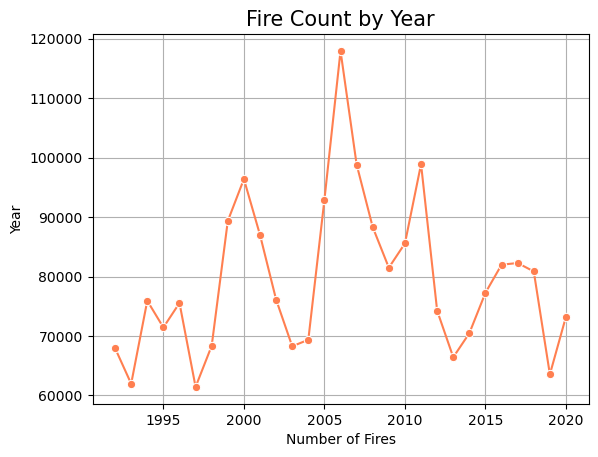

In [21]:
# Plot using Seaborn
# plt.figure(figsize=(10,6))
sns.lineplot(x=fire_count_by_year.index, y=fire_count_by_year.values, marker="o", color="coral")
plt.title("Fire Count by Year", fontsize=15)
plt.xlabel("Number of Fires")
plt.ylabel("Year")
plt.grid(True)

  - **Explanation of Findings**: 
    The line chart shows the trend of the number of fires over the years from 1992 to 2020. Key observations include:
    - The number of fires shows significant fluctuations over the years.
    - There is a notable increase in the number of fires starting around 1999, peaking in 2006 with 117,943 fires.
    - After 2006, the number of fires generally shows a downward trend with some fluctuations, including another peak in 2011 with 98,903 fires.
    - The highest number of fires recorded in a single year is 117,943 in 2006.
    - The number of fires in recent years (2019 and 2020) appears to be lower compared to the earlier peaks.

  - **Question to Answer**: 
    What factors contribute to the significant increase in the number of fires starting around 1999, peaking in 2006, and fluctuating afterwards? Why did the number of fires peak again in 2011, and what might explain the overall downward trend in recent years?

  - **Further Analysis**:
    - Investigate external factors such as climate data, changes in land use, and policy changes during the period from 1999 to 2020 to identify factors that may have contributed to the fluctuations in fire counts.
    - Perform a regional analysis to determine if specific areas experienced higher fire counts and whether these areas contributed to the peaks and trends observed.
    - Examine the causes of fires to see if certain causes became more prevalent during the peak years and how these causes varied over time.
    - Analyze the sizes of fires to determine if the size of fires changed significantly during the years with the highest counts and if larger fires contributed to the peaks.


### Fire Count by State

In [22]:
fire_by_state = df["STATE"].value_counts()
fire_by_state

CA    251881
GA    185040
TX    180087
NC    130165
AZ    104956
FL    103409
NY     99142
SC     88052
MS     84706
AL     74833
OR     71449
CO     68629
MT     51960
MN     51074
OK     50189
NM     43578
ID     42060
WA     40776
WI     38191
AR     37947
UT     36982
SD     36389
TN     34531
LA     33129
NJ     32251
KY     30874
WV     25064
VA     24542
MO     24510
PR     22202
NV     20210
ND     20020
WY     20009
MI     19127
KS     18576
ME     16439
AK     15195
PA     12861
NE     11743
HI      9970
MA      8371
CT      6714
OH      5675
IA      5672
MD      4157
NH      3081
IL      3022
IN      2277
RI       787
VT       781
DE       198
DC        83
Name: STATE, dtype: int64

Text(0, 0.5, 'State')

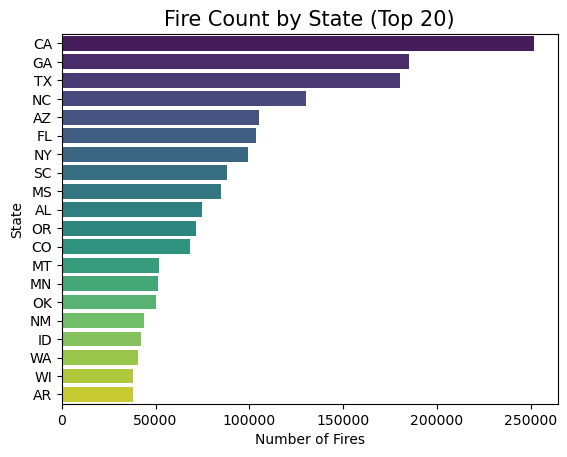

In [23]:
top_20_states = fire_by_state.head(20)
sns.barplot(x=top_20_states.values, y=top_20_states.index, palette="viridis")
plt.title('Fire Count by State (Top 20)', fontsize=15)
plt.xlabel('Number of Fires')
plt.ylabel('State')

  - **Explanation of Findings**:
    The bar chart shows the number of fires in the states with the highest fire counts. This helps us identify which states are most affected by wildfires. Notably, California (CA) has the highest number of fires, followed by Georgia (GA) and Texas (TX). These states, along with North Carolina (NC) and Arizona (AZ), form the top five states with the most wildfire occurrences.

  - **Question to Answer**:
    Which states are most affected by wildfires, and what factors might contribute to the higher number of fires in these states?


### Fire Size Classification

In [24]:
fire_size_class = df["FIRE_SIZE_CLASS"].value_counts()
fire_size_class

B    1104387
A     876409
C     257096
D      34008
E      17191
F       9692
G       4783
Name: FIRE_SIZE_CLASS, dtype: int64

Text(0, 0.5, 'Number of Fires')

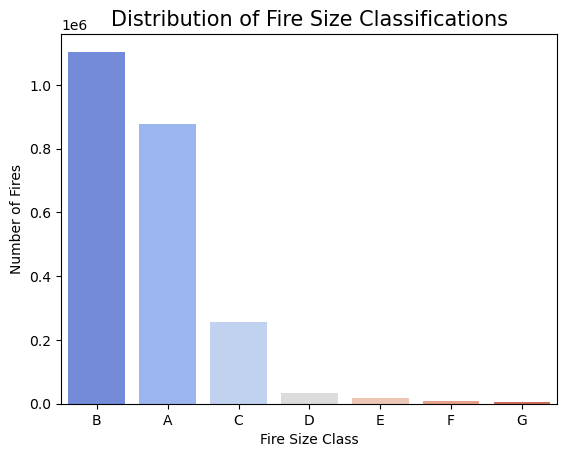

In [25]:
sns.barplot(x=fire_size_class.index, y=fire_size_class.values, palette='coolwarm')
plt.title('Distribution of Fire Size Classifications', fontsize=15)
plt.xlabel('Fire Size Class')
plt.ylabel('Number of Fires')

- **Explanation of Findings**:
  The bar chart shows the distribution of fires based on their size classification. The majority of fires fall into the smallest size classes:
  - **Class B (0.26-9.9 acres)**: 1,104,387 fires, covering a small acreage.
  - **Class A (greater than 0 but less than or equal to 0.25 acres)**: 876,409 fires, also covering a small acreage.
  - **Class C (10.0-99.9 acres)**: 257,096 fires.
  - **Class D (100-299 acres)**: 34,008 fires.
  - **Class E (300-999 acres)**: 17,191 fires.
  - **Class F (1000-4999 acres)**: 9,692 fires.
  - **Class G (5000+ acres)**: 4,783 fires, covering the largest acreage.

  The vast majority of fires are in classes A and B, which indicates that most wildfires are relatively small in size. However, the fewer number of Class G fires, although less frequent, likely cover much larger areas and have a significant impact.

- **Question to Answer**:
  - Are certain states more prone to larger fires (Classes D, E, F, and G) compared to smaller fires (Classes A, B, and C)?
  - How do the causes of fires vary with fire size? Are certain causes more likely to result in larger fires?


### Fire Cause Classification

Text(0, 0.5, 'Fire Cause')

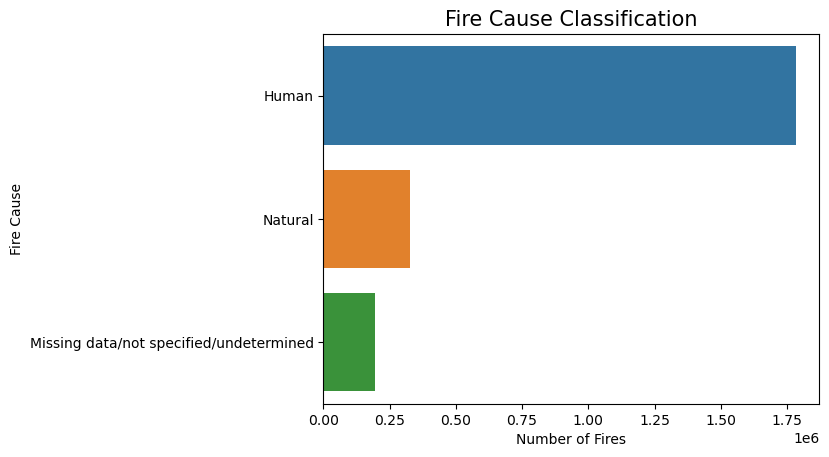

In [26]:
fire_cause_classification = df['NWCG_CAUSE_CLASSIFICATION'].value_counts()
sns.barplot(x=fire_cause_classification.values, y=fire_cause_classification.index)
plt.title('Fire Cause Classification', fontsize=15)
plt.xlabel('Number of Fires')
plt.ylabel('Fire Cause')

- **Explanation of Findings**:
  - The bar chart shows that human causes are the most common reason for wildfires, followed by natural causes. There is also a significant number of instances where the cause is missing, not specified, or undetermined.

### General Cause

In [27]:
general_cause_distribution = df['NWCG_GENERAL_CAUSE'].value_counts()
general_cause_distribution

Missing data/not specified/undetermined       597933
Debris and open burning                       535851
Natural                                       327319
Arson/incendiarism                            320814
Equipment and vehicle use                     190319
Recreation and ceremony                        99473
Misuse of fire by a minor                      66280
Smoking                                        63783
Railroad operations and maintenance            37292
Power generation/transmission/distribution     32652
Fireworks                                      18599
Other causes                                   10517
Firearms and explosives use                     2734
Name: NWCG_GENERAL_CAUSE, dtype: int64

Text(0, 0.5, 'General Cause')

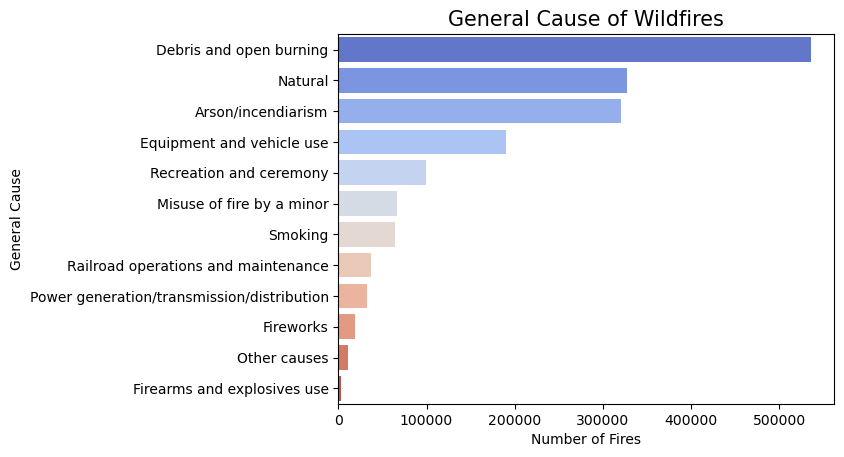

In [28]:
filtered_df = df.loc[df['NWCG_GENERAL_CAUSE'] != 'Missing data/not specified/undetermined', 'NWCG_GENERAL_CAUSE'].value_counts()
sns.barplot(x=filtered_df.values, y=filtered_df.index, palette='coolwarm')
plt.title('General Cause of Wildfires', fontsize=15)
plt.xlabel('Number of Fires')
plt.ylabel('General Cause')

### Temporal Analysis

In [29]:
df.columns

Index(['OBJECTID', 'Shape', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_INCIDENT_ID', 'FIRE_NAME',
       'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE',
       'FIPS_NAME'],
      dtype='object')

In [30]:
# Extract month from discovery date and it as new column
df['DISCOVERY_MONTH'] = df['DISCOVERY_DATE'].dt.strftime('%b')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['DISCOVERY_MONTH'] = pd.Categorical(df['DISCOVERY_MONTH'], categories=month_order, ordered=True)

In [31]:
fire_by_month = df["DISCOVERY_MONTH"].value_counts().sort_index()
fire_by_month

Jan    114549
Feb    175843
Mar    284158
Apr    285065
May    203979
Jun    207004
Jul    297770
Aug    250990
Sep    163292
Oct    130899
Nov    118506
Dec     71511
Name: DISCOVERY_MONTH, dtype: int64

Text(0, 0.5, 'Number of Fires')

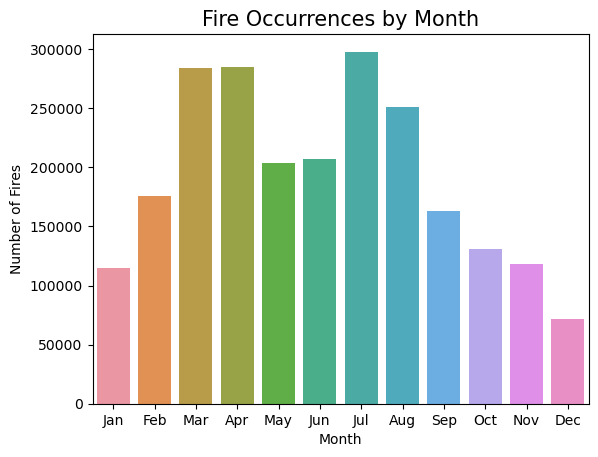

In [32]:
sns.barplot(x=fire_by_month.index, y=fire_by_month.values)
plt.title('Fire Occurrences by Month', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Number of Fires')

- **Explanation of Findings**:
  The bar chart shows the distribution of wildfire occurrences by month. Key observations include:
  - **March and April**: These months have the highest number of wildfires.
  - **July**: Another peak is observed in July with 297,770 fires, indicating a significant increase in wildfire occurrences during the summer.
  - **December**: This month has the lowest number of wildfires.
  - **Seasonal Trends**: The data indicates higher wildfire activity during the spring and summer months, with a noticeable drop during the fall and winter months.

- **Question to Answer**:
  - Why do March and April have such high numbers of wildfires compared to other months?
  - What factors contribute to the peak in July?
  - Are there specific weather patterns or human activities that influence the seasonal trends in wildfire occurrences?


### Geographical Analysis

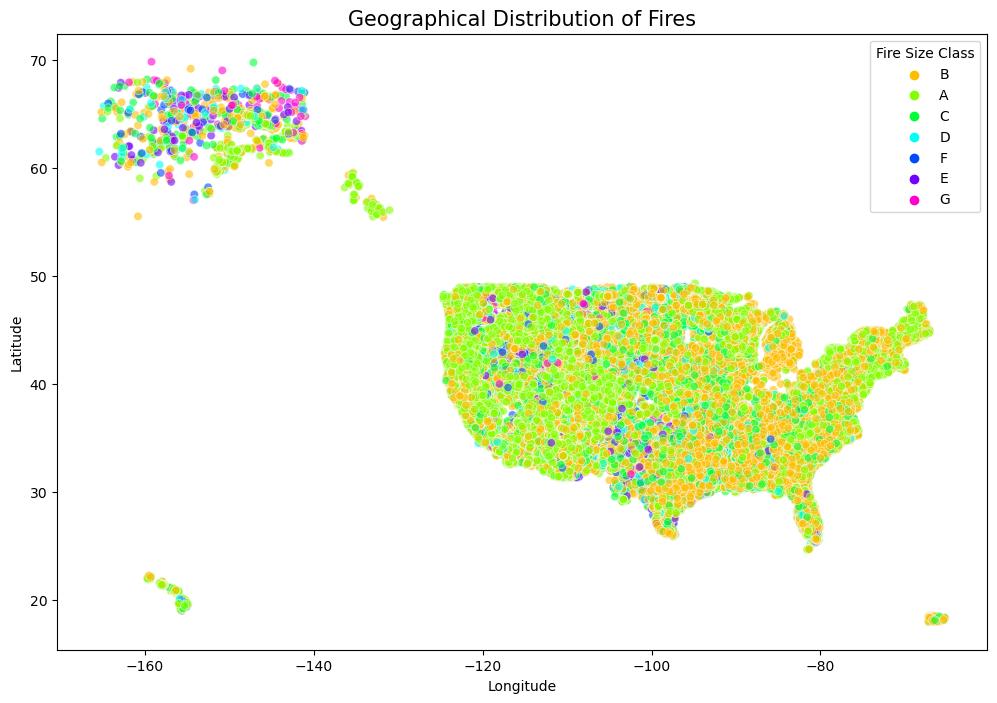

In [33]:
# take sample data
sampled_df = df.sample(frac=0.1, random_state=1) 

# define custome color palette
palette = sns.color_palette("hsv", n_colors=sampled_df["FIRE_SIZE_CLASS"].nunique())

plt.figure(figsize=(12,8))
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=sampled_df, hue="FIRE_SIZE_CLASS", palette=palette, alpha=0.6)
plt.title('Geographical Distribution of Fires', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fire Size Class')

- **Explanation of Findings**:
  The scatter plot shows the geographical distribution of wildfires across the United States. Key observations include:
  - **Widespread Distribution**: Wildfires occur throughout the United States. There are particularly high concentrations of wildfires in the western states, such as California, and in parts of the southeastern United States.
  - **Fire Size Classes**: The plot uses different colors to represent different fire size classes. The majority of fires are in the smaller size classes (A and B), indicated by the prevalence of green and yellow dots. However, larger fires (Classes E, F, and G) are more frequent in Alaska, with significant occurrences also visible in the western, central, and central southern parts of the United States.
  - **Regional Variations**: Most fires in the eastern United States are smaller (Classes A, B, and C), while the western and central parts of the country show a broader distribution of fire sizes, including larger fires.
  - **Alaska and Hawaii**: In Alaska, large fires (Classes E, F, and G) dominate, whereas Hawaii shows a distribution of various fire sizes, though smaller fires are more common.

In [34]:
# Extract day name from discovery date and add it as a new column
df["DISCOVERY_DAY_NAME"] = df["DISCOVERY_DATE"].dt.day_name()

fire_count_by_day = df["DISCOVERY_DAY_NAME"].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
fire_count_by_day

Monday       333077
Tuesday      317919
Wednesday    316308
Thursday     314071
Friday       316338
Saturday     366516
Sunday       339337
Name: DISCOVERY_DAY_NAME, dtype: int64

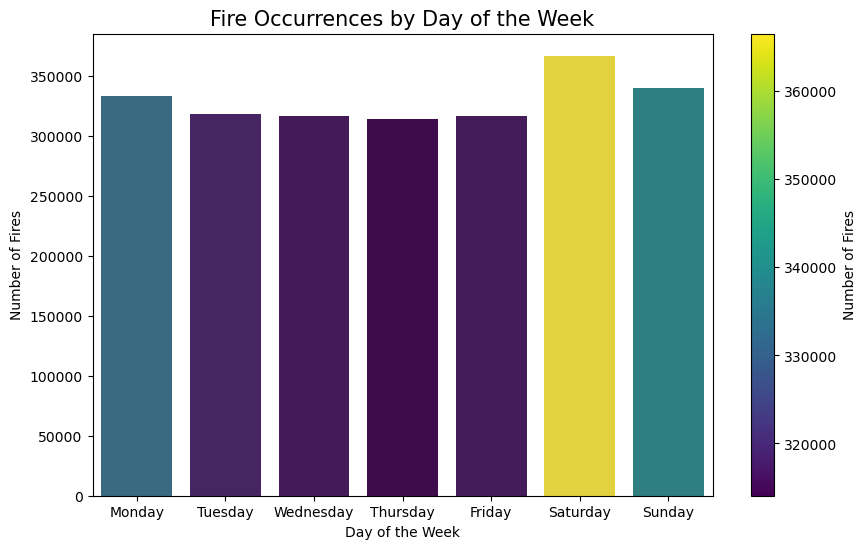

In [35]:
norm = mcolors.Normalize(fire_count_by_day.values.min(), fire_count_by_day.values.max())

# Create a colormap
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
colors = sm.to_rgba(fire_count_by_day.values)


plt.figure(figsize=(10, 6))
ax = sns.barplot(x=fire_count_by_day.index, y=fire_count_by_day.values, palette=colors)
plt.title('Fire Occurrences by Day of the Week', fontsize=15)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fires')

# Add color bar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Number of Fires')

- **Explanation of Findings**:
  The bar chart shows the distribution of wildfire occurrences by day of the week. Key observations include:
  - **Saturday**: This day has the highest number of wildfires, with 366,516 occurrences.
  - **Sunday and Monday**: These days also show high wildfire activity, with 339,337 and 333,077 occurrences, respectively.
  - **Weekdays**: The number of fires is relatively consistent from Monday to Friday, with a slight decrease mid-week.
  - **Overall Trend**: Wildfires are more common on weekends, suggesting a possible link to human activities during these days.


## Fetching Google Trends Data

### States with high wildfire incidents based on wildfire dataset

In [36]:
pytrends = TrendReq(hl='en-US', tz=360)
keywords = ["wildfire", "forest fire", "bushfire", "fire prevention", "campfire"]
timeframe = "2004-01-01 2020-12-31"
states = ["CA", "GA", "TX", "NC", "AZ", "FL"]
state_trends = {}
for state_code in states:
    geo = f"US-{state_code}"
    pytrends.build_payload(kw_list=keywords,timeframe=timeframe,geo=geo)
    data = pytrends.interest_over_time()
    if not data.empty:
        state_trends[state_code] = data.drop(labels=["isPartial"], axis="columns")
        
for state, data in state_trends.items():
    print(f"Google Trends data for {state}:\n{data.head(10)}\n")

Google Trends data for CA:
            wildfire  forest fire  bushfire  fire prevention  campfire
date                                                                  
2004-01-01         7            2         0                4         5
2004-02-01         8            5         0                0         6
2004-03-01         8            3         0                0         5
2004-04-01         9            3         0                0         6
2004-05-01        10            3         0                2         6
2004-06-01         9            5         0                2         8
2004-07-01        15            8         0                0         9
2004-08-01         8            9         0                3         8
2004-09-01         8            5         0                0         8
2004-10-01         9            7         0                3         7

Google Trends data for GA:
            wildfire  forest fire  bushfire  fire prevention  campfire
date                  

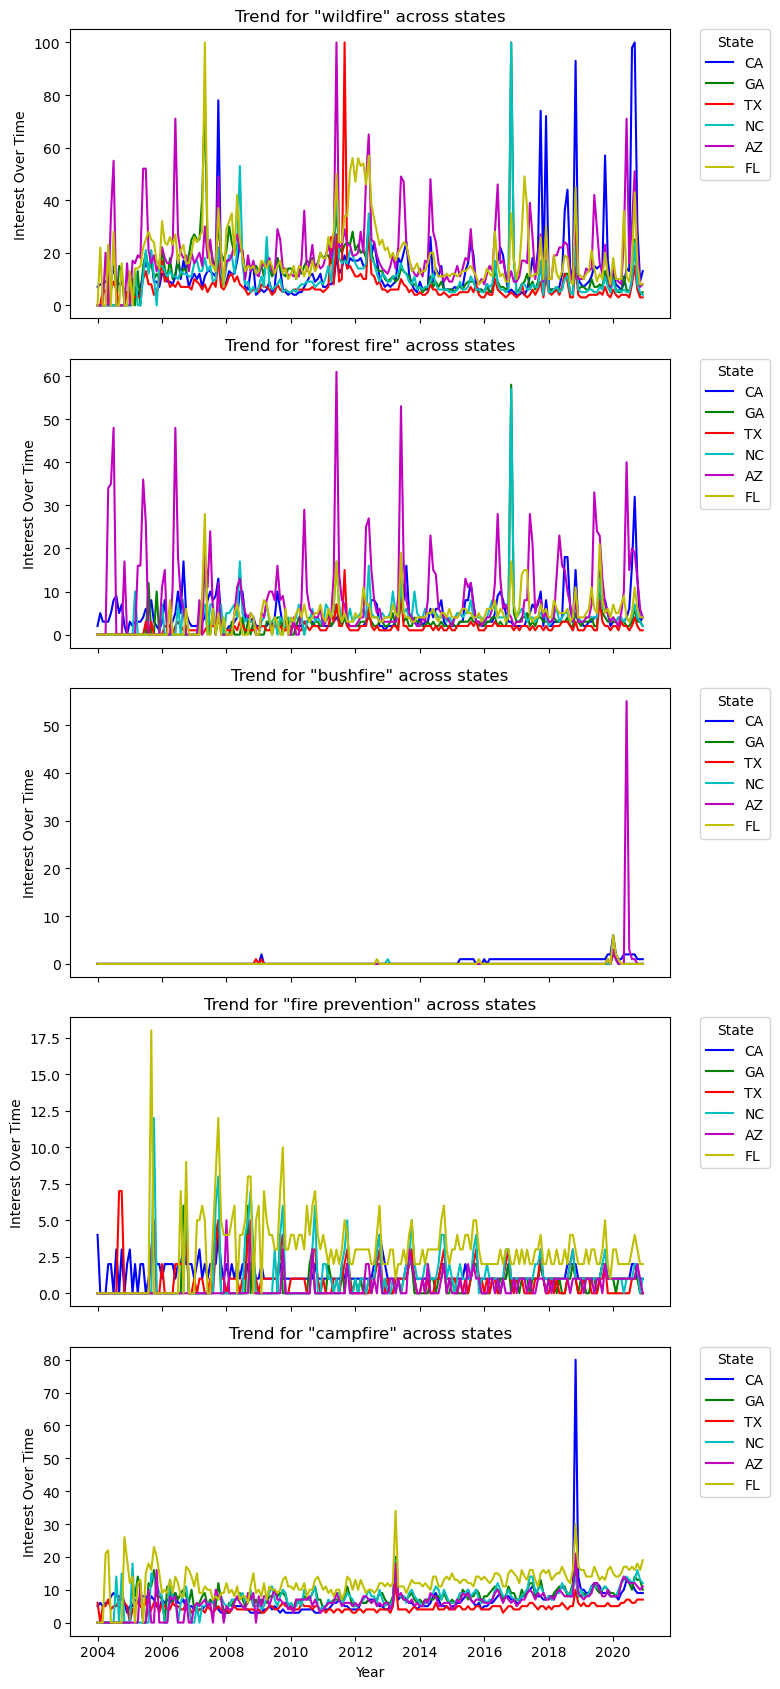

In [37]:
states = ['CA', 'GA', 'TX', 'NC', 'AZ', 'FL']
keywords = ["wildfire", "forest fire", "bushfire", "fire prevention", "campfire"]

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(9, 17), sharex=True)

colors = ['b', 'g', 'r', 'c', 'm', 'y']
state_color = dict(zip(states, colors))

for ax, keyword in zip(axes.flatten(), keywords):
    for state in states:
        if keyword in state_trends[state].columns:
            ax.plot(state_trends[state].index, state_trends[state][keyword], label=f"{state}", color=state_color[state])
    ax.set_title(f'Trend for "{keyword}" across states')
    ax.set_ylabel('Interest Over Time')
    ax.legend(title="State", loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

axes[-1].set_xlabel('Year')
plt.tight_layout()
plt.subplots_adjust(right=0.75)

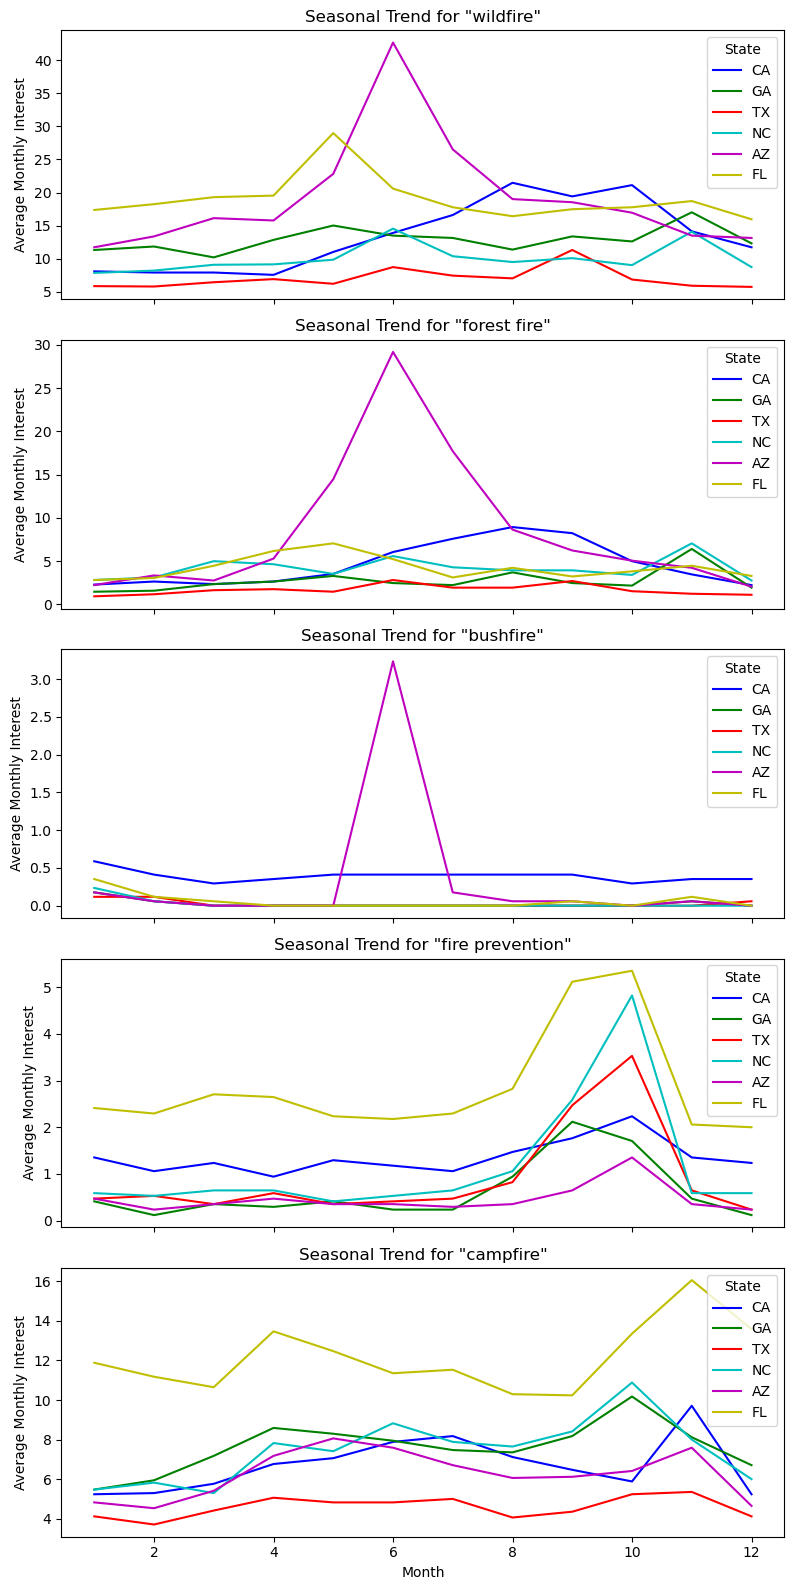

In [38]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 16), sharex=True)

for i, keyword in enumerate(keywords):
    ax = axes[i]
    for state in states:
        if keyword in state_trends[state].columns:
            monthly_data = state_trends[state][[keyword]].copy()
            monthly_data['Month'] = monthly_data.index.month
            monthly_avg = monthly_data.groupby('Month')[keyword].mean()
            ax.plot(monthly_avg.index, monthly_avg, label=f"{state}", color=state_color[state])

    ax.set_title(f'Seasonal Trend for "{keyword}"')
    ax.set_ylabel('Average Monthly Interest')
    ax.legend(title="State")

axes[-1].set_xlabel('Month')
plt.tight_layout()

# Analysis on High Wildfire Incidence State

## Overview
Our research focuses on analyzing wildfire incidents within a single state, chosen for its high frequency of occurrences. This targeted approach allows for a detailed exploration of specific factors and trends that significantly impact areas prone to wildfires.

## Purpose
- **Concentration of Data**: Focusing on a state with a dense occurrence of wildfire events provides a dataset for in-depth analysis.
- **Relevance to Local Conditions**: Our study is specifically designed for a particular region to ensure that findings are directly applicable and beneficial for local wildfire management strategies.

## Procedure
- **Data Filtering**: We will refine our dataset to include only data from the selected state, ensuring that our analysis is pertinent to local conditions.
- **Integration of Additional Data**: Environmental variables and Google Trends data relevant to the chosen state will be incorporated, providing a complete view of the factors influencing wildfire trends in this area.


In [39]:
# Filter the dataset for records from California
df_ca = df[df['STATE'] == 'CA']

In [40]:
df_ca

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_DAY_NAME
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,PNF-47,FOUNTAIN,2005,2005-02-02,33,1300.0,Human,Power generation/transmission/distribution,2005-02-02 00:00:00,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63,6063.0,Plumas County,Feb,Wednesday
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,PIGEON,2004,2004-05-12,133,845.0,Natural,Natural,2004-05-12 00:00:00,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61,6061.0,Placer County,May,Wednesday
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,021,SLACK,2004,2004-05-31,152,1921.0,Human,Debris and open burning,2004-05-31 00:00:00,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,6017.0,El Dorado County,May,Monday
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,6,DEER,2004,2004-06-28,180,1600.0,Natural,Natural,2004-07-03 00:00:00,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3,6003.0,Alpine County,Jun,Monday
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,7,STEVENOT,2004,2004-06-28,180,1600.0,Natural,Natural,2004-07-03 00:00:00,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3,6003.0,Alpine County,Jun,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303542,2303543,b'\x00\x01\xad\x10\x00\x00\xdc\xbd@\x9ci\xc3]\...,400732952,ICS209_2019_10757785,INTERAGCY,IA-ICS209,ST/C&L,USCAVNC,Ventura County Fire Department,CAVNC,Ventura County Fire Department,90135,MARIA,2019,2019-10-31,304,2115.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,Unknown,Unknown,Unknown,9999.00,G,34.337222,-119.053333,MISSING/NOT SPECIFIED,CA,Ventura,6111.0,Ventura County,Oct,Thursday
2303543,2303544,"b""\x00\x01\xad\x10\x00\x00\x80\x1b\x91>\xb9\xf...",400732953,ICS209_2019_10762771,INTERAGCY,IA-ICS209,ST/C&L,USCASLU,San Luis Obispo Unit,CASLU,San Luis Obispo Unit,7006,BELMONT,2019,2019-05-29,149,1900.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,Unknown,Unknown,Unknown,835.00,E,35.307500,-119.964444,MISSING/NOT SPECIFIED,CA,San Luis Obispo,6079.0,San Luis Obispo County,May,Wednesday
2303551,2303552,b'\x00\x01\xad\x10\x00\x00x-\x1b\xaf\xf6O^\xc0...,400732962,ICS209_2019_10781965,INTERAGCY,IA-ICS209,ST/C&L,USCASCU,Santa Clara Unit,CASCU,Santa Clara Unit,4384,ROCK,2019,2019-06-25,176,2230.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,Unknown,Unknown,Unknown,2422.00,F,37.472222,-121.249444,MISSING/NOT SPECIFIED,CA,Stanislaus,6099.0,Stanislaus County,Jun,Tuesday
2303556,2303557,b'\x00\x01\xad\x10\x00\x00|?q\n\xcf*^\xc0\xb0u...,400732973,ICS209_2019_10802166,INTERAGCY,IA-ICS209,FS,USCAPNF,Plumas National Forest,CAPNF,Plumas National Forest,1324,WALKER,2019,2019-09-04,247,1446.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,Unknown,Unknown,Unknown,54608.00,G,40.053250,-120.668900,MISSING/NOT SPECIFIED,CA,Plumas,6063.0,Plumas County,Sep,Wednesday


### Analysis of CONT_DOY Missing Values
- To understand the distribution of CONT_DOY where values are known and its correlation with DISCOVERY_DOY and FIRE_SIZE to fill missing values.


In [41]:
df_ca['CONT_DOY']

0             33.0
1            133.0
2            152.0
3            185.0
4            185.0
            ...   
2303542    Unknown
2303543    Unknown
2303551    Unknown
2303556    Unknown
2303562    Unknown
Name: CONT_DOY, Length: 251881, dtype: object

In [42]:
df_ca['CONT_DOY'].unique()

array([33.0, 133.0, 152.0, 185.0, 183.0, 184.0, 67.0, 74.0, 247.0, 272.0,
       277.0, 295.0, 291.0, 326.0, 178.0, 114.0, 176.0, 129.0, 189.0,
       117.0, 200.0, 170.0, 147.0, 168.0, 122.0, 203.0, 202.0, 41.0, 45.0,
       148.0, 140.0, 204.0, 205.0, 194.0, 163.0, 207.0, 174.0, 192.0,
       198.0, 197.0, 199.0, 149.0, 209.0, 153.0, 156.0, 201.0, 157.0,
       193.0, 164.0, 196.0, 211.0, 190.0, 154.0, 34.0, 214.0, 95.0, 206.0,
       210.0, 217.0, 218.0, 111.0, 220.0, 191.0, 151.0, 186.0, 221.0,
       223.0, 212.0, 225.0, 226.0, 219.0, 228.0, 166.0, 76.0, 167.0,
       181.0, 208.0, 171.0, 229.0, 238.0, 134.0, 135.0, 234.0, 150.0,
       241.0, 173.0, 102.0, 224.0, 172.0, 242.0, 236.0, 240.0, 112.0,
       119.0, 120.0, 246.0, 248.0, 254.0, 256.0, 237.0, 245.0, 249.0,
       261.0, 188.0, 215.0, 125.0, 216.0, 113.0, 222.0, 253.0, 239.0,
       177.0, 232.0, 161.0, 275.0, 230.0, 270.0, 255.0, 180.0, 108.0,
       118.0, 233.0, 235.0, 195.0, 251.0, 262.0, 263.0, 264.0, 267.0,
       

In [43]:
(df_ca["CONT_DOY"] == "Unknown").sum() / len(df_ca)

0.46799480707159336

In [44]:
df_ca[["CONT_DOY", "CONT_DATE"]]

,CONT_DOY,CONT_DATE
0,33.0,2005-02-02 00:00:00
1,133.0,2004-05-12 00:00:00
2,152.0,2004-05-31 00:00:00
3,185.0,2004-07-03 00:00:00
4,185.0,2004-07-03 00:00:00
...,...,...
2303542,Unknown,Unknown
2303543,Unknown,Unknown
2303551,Unknown,Unknown
2303556,Unknown,Unknown


In [45]:
(df_ca["CONT_DATE"] == "Unknown").sum() / len(df_ca)

0.46799480707159336

In [46]:
df_ca = df_ca.copy()
df_ca['CONT_DOY'] = df_ca['CONT_DOY'].replace('Unknown', np.nan).astype(float)

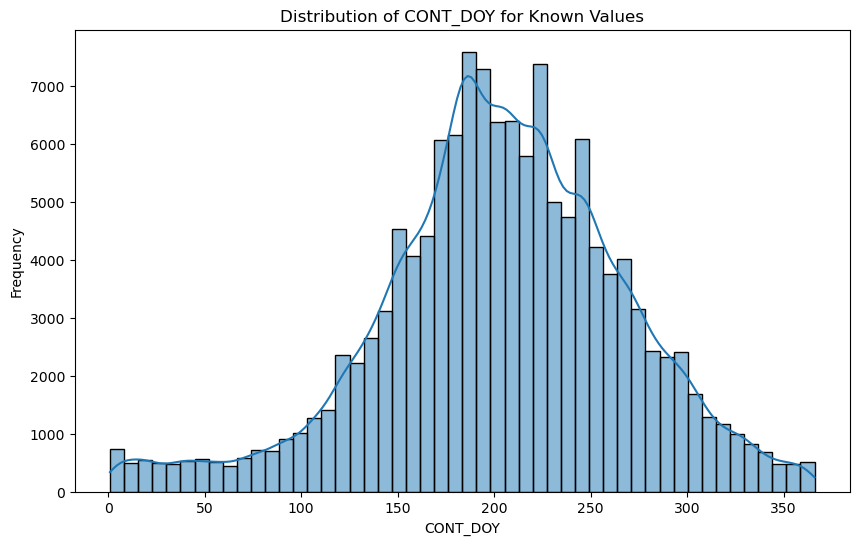

Correlation Matrix:
                CONT_DOY  DISCOVERY_DOY  FIRE_SIZE
CONT_DOY       1.000000       0.994977   0.029792
DISCOVERY_DOY  0.994977       1.000000   0.010062
FIRE_SIZE      0.029792       0.010062   1.000000


,CONT_DOY,DISCOVERY_DOY,FIRE_SIZE
0,33.0,33,0.10
1,133.0,133,0.25
2,152.0,152,0.10
3,185.0,180,0.10
4,185.0,180,0.10
5,183.0,182,0.10
6,184.0,183,0.10
7,67.0,67,0.80
8,74.0,74,1.00
9,184.0,183,0.10


In [47]:
#  Understand the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_ca[df_ca['CONT_DOY'] != 'Unknown']['CONT_DOY'], bins=50, kde=True)
plt.title('Distribution of CONT_DOY for Known Values')
plt.xlabel('CONT_DOY')
plt.ylabel('Frequency')
plt.show()

# Correlation Analysis
correlation = df_ca[['CONT_DOY', 'DISCOVERY_DOY', 'FIRE_SIZE']].corr()
print("Correlation Matrix:\n", correlation)

# Display the first few rows of the dataset for CONT_DOY not 'Unknown'
df_ca[df_ca['CONT_DOY'] != -1][['CONT_DOY', 'DISCOVERY_DOY', 'FIRE_SIZE']].head(10)

- The correlation between DISCOVERY_DOY and FIRE_SIZE is very low (0.010062), while the correlation between DISCOVERY_DOY and CONT_DOY is high. 
- FIRE_SIZE does not seem to have a strong relationship with either CONT_DOY or DISCOVERY_DOY from the given rows.

In [48]:
df_ca["DISCOVERY_DOY"].unique()

array([ 33, 133, 152, 180, 182, 183,  67,  74, 184, 247, 272, 277, 280,
       287, 325, 178, 114, 176, 126, 189, 117, 199, 170, 147, 168, 122,
       203, 202,  41,  45, 148, 140, 205, 201, 194, 162, 207, 174, 192,
       197, 149, 209, 153, 156, 157, 193, 164, 196, 190, 154,  34, 214,
        95, 204, 206, 217, 200, 110, 219, 218, 151, 185, 186, 220, 221,
       223, 212, 225, 226, 228, 166,  76, 107, 167, 181, 208, 171, 229,
       238, 134, 135, 234, 150, 241, 173, 102, 224, 172, 195, 242, 236,
       240, 175, 112, 119, 246, 248, 254, 255, 237, 245, 249, 261, 188,
       215, 125, 216, 113, 222, 253, 256, 239, 177, 232, 161, 211, 275,
       230, 270, 108, 233, 235, 198, 251, 262, 263, 210, 267, 276, 259,
       269, 271, 227, 264, 252, 258, 260, 243, 244, 257, 279, 293, 268,
       266, 265, 298, 250,  58,  75, 146, 295, 286, 274,   5,  59,  86,
       101, 105, 121, 136, 141, 300, 145, 155, 306, 158, 165, 187, 278,
       296, 191, 289, 283, 231, 282, 310, 303, 312, 281, 309, 31

### Filling Missing CONT_DOY Values
- Calculate the median difference between CONT_DOY and DISCOVERY_DOY for known values and use this to impute the missing CONT_DOY values.


In [49]:
# Calculate the difference between CONT_DOY and DISCOVERY_DOY for known values
df_ca.loc[:, 'DOY_DIFF'] = df_ca['CONT_DOY'] - df_ca['DISCOVERY_DOY']

# Calculate the median difference
median_diff = df_ca['DOY_DIFF'].median()

# Impute missing CONT_DOY based on DISCOVERY_DOY and median difference
df_ca.loc[:, 'CONT_DOY'] = np.where(df_ca['CONT_DOY'].isna(),
                                    df_ca['DISCOVERY_DOY'] + median_diff,
                                    df_ca['CONT_DOY'])

# Drop the DOY_DIFF column
df_ca.drop(columns=['DOY_DIFF'], inplace=True)

# Check the imputation
df_ca[['DISCOVERY_DOY', 'CONT_DOY']].tail(40)

,DISCOVERY_DOY,CONT_DOY
2291676,191,191.0
2291677,121,121.0
2291678,160,160.0
2291679,48,48.0
2291680,165,165.0
2291681,235,235.0
2291682,228,228.0
2291683,251,251.0
2291684,180,180.0
2291685,171,171.0


In [50]:
type(df["CONT_DATE"].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

##  Impute CONT_DATE Using CONT_DOY

In [51]:
# Ensure CONT_DOY is a float type before converting it to int
df_ca['CONT_DOY'] = df_ca['CONT_DOY'].astype(float)

# Impute CONT_DATE using CONT_DOY and FIRE_YEAR
df_ca['CONT_DATE'] = np.where(df_ca['CONT_DATE'] == "Unknown",
                              pd.to_datetime(df_ca['FIRE_YEAR'].astype(str) + df_ca['CONT_DOY'].astype(int).astype(str), format='%Y%j', errors='coerce'),
                              df_ca['CONT_DATE'])

# Identify numeric timestamps and convert them
numeric_mask = df_ca['CONT_DATE'].apply(lambda x: isinstance(x, (int, np.int64)))
df_ca.loc[numeric_mask, 'CONT_DATE'] = pd.to_datetime(df_ca.loc[numeric_mask, 'CONT_DATE'], unit='ns')

# Ensure all dates are in the same datetime format
df_ca['CONT_DATE'] = pd.to_datetime(df_ca['CONT_DATE'], errors='coerce')

df_ca['CONT_DATE'].tail(10)

2303525   2019-08-14
2303528   2019-07-28
2303531   2019-10-30
2303536   2019-10-10
2303541   2019-08-22
2303542   2019-10-31
2303543   2019-05-29
2303551   2019-06-25
2303556   2019-09-04
2303562   2020-07-11
Name: CONT_DATE, dtype: datetime64[ns]

### Fill CONT_TIME and DISCOVERY_TIME from DISCOVERY_DOY, CONT_DOY and FIRE_SIZE_CLASS

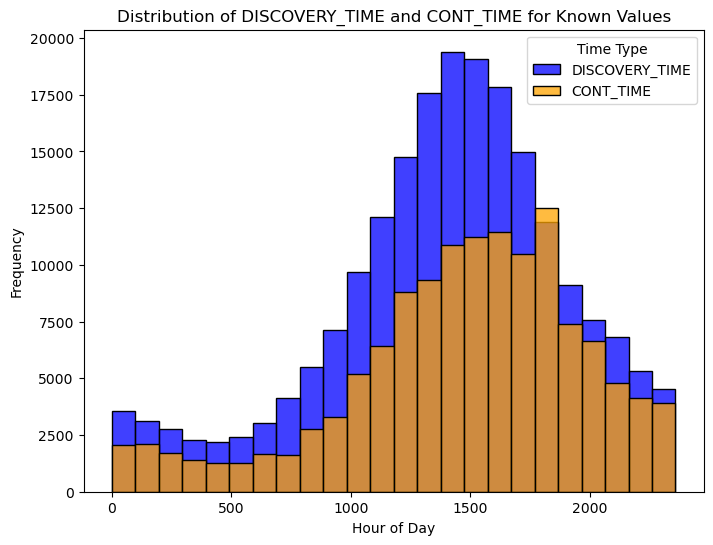

In [52]:
plt.figure(figsize=(8, 6))

# Plot the distribution of DISCOVERY_TIME
sns.histplot(df_ca[df_ca['DISCOVERY_TIME'] != 'Unknown']['DISCOVERY_TIME'].dropna(), 
             bins=24, kde=False, color='blue', label='DISCOVERY_TIME')

# Plot the distribution of CONT_TIME
sns.histplot(df_ca[df_ca['CONT_TIME'] != 'Unknown']['CONT_TIME'].dropna(), 
             bins=24, kde=False, color='orange', label='CONT_TIME')

plt.title('Distribution of DISCOVERY_TIME and CONT_TIME for Known Values')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.legend(title='Time Type')

In [53]:
df[["CONT_TIME", "DISCOVERY_TIME"]]

,CONT_TIME,DISCOVERY_TIME
0,1730.0,1300.0
1,1530.0,845.0
2,2024.0,1921.0
3,1400.0,1600.0
4,1200.0,1600.0
...,...,...
2303561,Unknown,1741.0
2303562,Unknown,1958.0
2303563,Unknown,1911.0
2303564,1900.0,755.0


 - Convert CONT_TIME and DISCOVERY_TIME to hh:mm Format

In [54]:
def convert_time_format(time_value):
    if pd.isnull(time_value) or time_value == "Unknown":
        return np.nan
    
    if isinstance(time_value, str) and ":" in time_value:
        return time_value
    
    time_value = int(time_value)
    hours = time_value // 100
    minutes = time_value % 100
    return f"{str(hours).zfill(2)}:{str(minutes).zfill(2)}"
    
# Apply the conversion function  
df_ca["DISCOVERY_TIME"] = df["DISCOVERY_TIME"].apply(convert_time_format)
df_ca["CONT_TIME"] = df["CONT_TIME"].apply(convert_time_format)

# Convert times to minutes since midnight
df_ca['DISCOVERY_TIME_MIN'] = pd.to_datetime(df_ca['DISCOVERY_TIME'], format='%H:%M', errors='coerce').dt.hour * 60 + pd.to_datetime(df_ca['DISCOVERY_TIME'], format='%H:%M', errors='coerce').dt.minute
df_ca['CONT_TIME_MIN'] = pd.to_datetime(df_ca['CONT_TIME'], format='%H:%M', errors='coerce').dt.hour * 60 + pd.to_datetime(df_ca['CONT_TIME'], format='%H:%M', errors='coerce').dt.minute
df_ca[["DISCOVERY_TIME", "CONT_TIME", "DISCOVERY_TIME_MIN", "CONT_TIME_MIN"]]

,DISCOVERY_TIME,CONT_TIME,DISCOVERY_TIME_MIN,CONT_TIME_MIN
0,13:00,17:30,780.0,1050.0
1,08:45,15:30,525.0,930.0
2,19:21,20:24,1161.0,1224.0
3,16:00,14:00,960.0,840.0
4,16:00,12:00,960.0,720.0
...,...,...,...,...
2303542,21:15,NaN,1275.0,NaN
2303543,19:00,NaN,1140.0,NaN
2303551,22:30,NaN,1350.0,NaN
2303556,14:46,NaN,886.0,NaN


- Calculate the median time differences for each FIRE_SIZE_CLASS

In [55]:
# Calculate time difference where both times are known
df_ca['TIME_DIFF_MIN'] = df_ca['CONT_TIME_MIN'] - df_ca['DISCOVERY_TIME_MIN']

# Group by FIRE_SIZE_CLASS and calculate the median time difference
median_time_diff_by_class = df_ca.groupby('FIRE_SIZE_CLASS')['TIME_DIFF_MIN'].median()

# Calculate the day difference
df_ca['DAY_DIFF'] = df_ca['CONT_DOY'] - df_ca['DISCOVERY_DOY']

# Use the median Discovery time for missing values
median_discovery_time = df_ca['DISCOVERY_TIME_MIN'].median()
df_ca['DISCOVERY_TIME_MIN'] = np.where(df_ca['DISCOVERY_TIME_MIN'].isna(),
                                       median_discovery_time,
                                       df_ca['DISCOVERY_TIME_MIN'])

# Impute CONT_TIME_MIN
df_ca['CONT_TIME_MIN'] = np.where(df_ca['CONT_TIME_MIN'].isna(),
                                  df_ca['DISCOVERY_TIME_MIN'] + df_ca['DAY_DIFF'] * 24 * 60 + 
                                  df_ca['FIRE_SIZE_CLASS'].map(median_time_diff_by_class),
                                  df_ca['CONT_TIME_MIN'])

# Impute DISCOVERY_TIME_MIN based on CONT_TIME_MIN and DAY_DIFF
df_ca['DISCOVERY_TIME_MIN'] = np.where(df_ca['DISCOVERY_TIME_MIN'].isna(),
                                       df_ca['CONT_TIME_MIN'] - df_ca['DAY_DIFF'] * 24 * 60 - 
                                       df_ca['FIRE_SIZE_CLASS'].map(median_time_diff_by_class),
                                       df_ca['DISCOVERY_TIME_MIN'])

median_time_diff_by_class

# df_ca[["DISCOVERY_TIME", "CONT_TIME", "DISCOVERY_TIME_MIN", "CONT_TIME_MIN"]]

FIRE_SIZE_CLASS
A     30.0
B     40.0
C    103.0
D    136.0
E    155.0
F    187.0
G    139.0
Name: TIME_DIFF_MIN, dtype: float64

In [56]:
# Convert minutes back to time format
def convert_minutes_to_time(minutes):
    total_hours = int(minutes // 60)
    hours = total_hours % 24 
    minutes = int(minutes % 60)
    return f"{str(hours).zfill(2)}:{str(minutes).zfill(2)}"

# Apply the conversion for rows where the time was imputed
df_ca['DISCOVERY_TIME'] = df_ca['DISCOVERY_TIME_MIN'].apply(convert_minutes_to_time)
df_ca['CONT_TIME'] = df_ca['CONT_TIME_MIN'].apply(convert_minutes_to_time)                    

# Convert any remaining time values to 'HH:MM' format
df_ca['DISCOVERY_TIME'] = df_ca['DISCOVERY_TIME'].apply(lambda x: x[:5] if isinstance(x, str) else x.strftime('%H:%M'))
df_ca['CONT_TIME'] = df_ca['CONT_TIME'].apply(lambda x: x[:5] if isinstance(x, str) else x.strftime('%H:%M'))

# Clean up temporary columns
df_ca.drop(columns=['DISCOVERY_TIME_MIN', 'CONT_TIME_MIN', 'TIME_DIFF_MIN', 'DAY_DIFF'], inplace=True)

In [57]:
df_ca[["DISCOVERY_DATE",'DISCOVERY_TIME', 'CONT_TIME', "CONT_DATE", "FIRE_SIZE_CLASS"]].head(10)

,DISCOVERY_DATE,DISCOVERY_TIME,CONT_TIME,CONT_DATE,FIRE_SIZE_CLASS
0,2005-02-02,13:00,17:30,2005-02-02,A
1,2004-05-12,08:45,15:30,2004-05-12,A
2,2004-05-31,19:21,20:24,2004-05-31,A
3,2004-06-28,16:00,14:00,2004-07-03,A
4,2004-06-28,16:00,12:00,2004-07-03,A
5,2004-06-30,18:00,16:00,2004-07-01,A
6,2004-07-01,18:00,14:00,2004-07-02,A
7,2005-03-08,13:00,16:00,2005-03-08,B
8,2005-03-15,12:00,17:00,2005-03-15,B
9,2004-07-01,18:00,18:00,2004-07-02,A


# Filtering Dataset for Predictive Modeling

- We filter the dataset to retain only the columns directly relevant to our predictive modeling task. The focus is on variables related to the temporal aspects of wildfires, fire size, geographical location, and the general cause of the fire.

In [64]:
# List of relevant columns to keep
columns_to_keep = [
    'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 
    'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 
    'FIRE_SIZE', 'FIRE_SIZE_CLASS', 
    'LATITUDE', 'LONGITUDE', 
    'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE'
]


df_wildfire_ca = df_ca[columns_to_keep]
df_wildfire_ca.head(10)

,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE
0,2005-02-02,33,13:00,2005-02-02,33.0,17:30,0.10,A,40.036944,-121.005833,Human,Power generation/transmission/distribution
1,2004-05-12,133,08:45,2004-05-12,133.0,15:30,0.25,A,38.933056,-120.404444,Natural,Natural
2,2004-05-31,152,19:21,2004-05-31,152.0,20:24,0.10,A,38.984167,-120.735556,Human,Debris and open burning
3,2004-06-28,180,16:00,2004-07-03,185.0,14:00,0.10,A,38.559167,-119.913333,Natural,Natural
4,2004-06-28,180,16:00,2004-07-03,185.0,12:00,0.10,A,38.559167,-119.933056,Natural,Natural
5,2004-06-30,182,18:00,2004-07-01,183.0,16:00,0.10,A,38.635278,-120.103611,Natural,Natural
6,2004-07-01,183,18:00,2004-07-02,184.0,14:00,0.10,A,38.688333,-120.153333,Natural,Natural
7,2005-03-08,67,13:00,2005-03-08,67.0,16:00,0.80,B,40.968056,-122.433889,Human,Debris and open burning
8,2005-03-15,74,12:00,2005-03-15,74.0,17:00,1.00,B,41.233611,-122.283333,Human,Debris and open burning
9,2004-07-01,183,18:00,2004-07-02,184.0,18:00,0.10,A,38.548333,-120.149167,Natural,Natural


In [65]:
# Rename the columns with more descriptive names
df_wildfire_ca = df_wildfire_ca.rename(columns={
    'DISCOVERY_DATE': 'DiscoveryDate',
    'DISCOVERY_DOY': 'DiscoveryDayOfYear',
    'DISCOVERY_TIME': 'DiscoveryTime',
    'CONT_DATE': 'ContainmentDate',
    'CONT_DOY': 'ContainmentDayOfYear',
    'CONT_TIME': 'ContainmentTime',
    'FIRE_SIZE': 'FireSize',
    'FIRE_SIZE_CLASS': 'FireSizeClass',
    'LATITUDE': 'Latitude',
    'LONGITUDE': 'Longitude',
    'NWCG_CAUSE_CLASSIFICATION': 'CauseClassification',
    'NWCG_GENERAL_CAUSE': 'GeneralCause'
})
df_wildfire_ca

,DiscoveryDate,DiscoveryDayOfYear,DiscoveryTime,ContainmentDate,ContainmentDayOfYear,ContainmentTime,FireSize,FireSizeClass,Latitude,Longitude,CauseClassification,GeneralCause
0,2005-02-02,33,13:00,2005-02-02,33.0,17:30,0.10,A,40.036944,-121.005833,Human,Power generation/transmission/distribution
1,2004-05-12,133,08:45,2004-05-12,133.0,15:30,0.25,A,38.933056,-120.404444,Natural,Natural
2,2004-05-31,152,19:21,2004-05-31,152.0,20:24,0.10,A,38.984167,-120.735556,Human,Debris and open burning
3,2004-06-28,180,16:00,2004-07-03,185.0,14:00,0.10,A,38.559167,-119.913333,Natural,Natural
4,2004-06-28,180,16:00,2004-07-03,185.0,12:00,0.10,A,38.559167,-119.933056,Natural,Natural
...,...,...,...,...,...,...,...,...,...,...,...,...
2303542,2019-10-31,304,21:15,2019-10-31,304.0,23:34,9999.00,G,34.337222,-119.053333,Missing data/not specified/undetermined,Missing data/not specified/undetermined
2303543,2019-05-29,149,19:00,2019-05-29,149.0,21:35,835.00,E,35.307500,-119.964444,Missing data/not specified/undetermined,Missing data/not specified/undetermined
2303551,2019-06-25,176,22:30,2019-06-25,176.0,01:37,2422.00,F,37.472222,-121.249444,Missing data/not specified/undetermined,Missing data/not specified/undetermined
2303556,2019-09-04,247,14:46,2019-09-04,247.0,17:05,54608.00,G,40.053250,-120.668900,Missing data/not specified/undetermined,Missing data/not specified/undetermined


## Sorting the Dataset by Date for Time-Series Analysis

- To prepare the dataset for time-series analysis using ARIMA and RNN models, it's essential to sort the data by `DiscoveryDate` and `DiscoveryTime`.

In [70]:
df_wildfire_ca['DiscoveryDate'] = pd.to_datetime(df_wildfire_ca['DiscoveryDate'])
df_wildfire_ca = df_wildfire_ca.sort_values(by=['DiscoveryDate', 'DiscoveryTime']).reset_index(drop=True)

In [89]:
df_wildfire_ca.head(20)

,DiscoveryDate,DiscoveryDayOfYear,DiscoveryTime,ContainmentDate,ContainmentDayOfYear,ContainmentTime,FireSize,FireSizeClass,Latitude,Longitude,CauseClassification,GeneralCause
0,1992-01-01,1,01:30,1992-01-01,1.0,02:10,0.1,A,38.205000,-120.335000,Natural,Natural
1,1992-01-01,1,13:30,1992-01-01,1.0,17:00,5.0,B,33.166700,-116.634200,Human,Debris and open burning
2,1992-01-01,1,14:37,1992-01-01,1.0,15:07,0.2,A,33.663889,-116.171944,Human,Misuse of fire by a minor
3,1992-01-02,2,14:37,1992-01-02,2.0,15:07,0.1,A,33.678056,-116.171944,Human,Misuse of fire by a minor
4,1992-01-02,2,14:37,1992-01-02,2.0,15:17,0.5,B,33.896111,-116.990000,Human,Missing data/not specified/undetermined
5,1992-01-02,2,14:37,1992-01-02,2.0,15:07,0.2,A,33.030000,-116.831944,Human,Missing data/not specified/undetermined
6,1992-01-03,3,14:37,1992-01-03,3.0,15:07,0.1,A,37.266111,-122.321944,Human,Equipment and vehicle use
7,1992-01-04,4,14:37,1992-01-04,4.0,15:07,0.1,A,33.996944,-117.426111,Human,Missing data/not specified/undetermined
8,1992-01-04,4,14:37,1992-01-04,4.0,15:07,0.1,A,33.808056,-117.268889,Human,Missing data/not specified/undetermined
9,1992-01-06,6,05:15,1992-01-06,6.0,08:00,0.1,A,34.341667,-118.106667,Human,Arson/incendiarism


In [84]:
df_wildfire_ca['GeneralCause'].value_counts()

Missing data/not specified/undetermined       95263
Equipment and vehicle use                     45660
Natural                                       30290
Arson/incendiarism                            24412
Debris and open burning                       20861
Recreation and ceremony                       11453
Misuse of fire by a minor                      9316
Smoking                                        8472
Power generation/transmission/distribution     3677
Other causes                                    784
Railroad operations and maintenance             773
Fireworks                                       645
Firearms and explosives use                     275
Name: GeneralCause, dtype: int64

In [86]:
df_wildfire_ca['CauseClassification'].value_counts()

Human                                      183173
Missing data/not specified/undetermined     38418
Natural                                     30290
Name: CauseClassification, dtype: int64